In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
mouse_drug_data_to_load = "data/mouse_drug_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)

# Combine the data into a single dataset
treatments_complete = pd.merge(clinical_trial_data,mouse_drug_data, how="left", on=["Mouse ID"])


# Display the data table for preview
treatments_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_group = treatments_complete.groupby(["Drug","Timepoint"])


# Convert to DataFrame
tumor_mean_df = pd.DataFrame({
        "Tumor Volume (mm3)" : tumor_group["Tumor Volume (mm3)"].mean()
})




# Preview DataFrame
tumor_mean_df.reset_index(inplace=True)
tumor_mean_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame
tumor_sem_df = pd.DataFrame({
        "Tumor Volume (mm3)" : tumor_group["Tumor Volume (mm3)"].sem()
})

# Preview DataFrame
tumor_sem_df.reset_index(inplace=True)
tumor_sem_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_df_pivot = tumor_mean_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  

# Preview that Reformatting worked
tumor_mean_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
tumor_sem_df_pivot = tumor_sem_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  

# Preview that Reformatting worked
tumor_sem_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [6]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


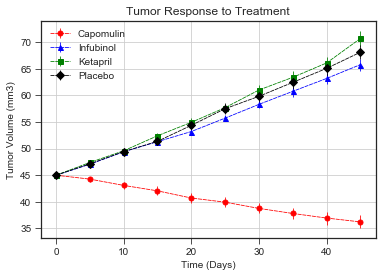

In [7]:
# Generate the Plot (with Error Bars)

plt.style.use('seaborn-ticks')

plt.errorbar(tumor_mean_df_pivot.index, tumor_mean_df_pivot['Capomulin'], yerr=tumor_sem_df_pivot['Capomulin'],
             color = 'red', marker='o', markersize=5, linestyle=(0, (5, 1)),linewidth=0.8)    #linestyle=(0, (5, 1)) means densely dashed

plt.errorbar(tumor_mean_df_pivot.index, tumor_mean_df_pivot['Infubinol'], yerr=tumor_sem_df_pivot['Infubinol'],
            color = 'blue', marker='^', markersize=5, linestyle=(0, (5, 1)),linewidth=0.8)

plt.errorbar(tumor_mean_df_pivot.index, tumor_mean_df_pivot['Ketapril'], yerr=tumor_sem_df_pivot['Ketapril'],
            color = 'green', marker='s', markersize=5, linestyle=(0, (5, 1)),linewidth=0.8)

plt.errorbar(tumor_mean_df_pivot.index, tumor_mean_df_pivot['Placebo'], yerr=tumor_sem_df_pivot['Placebo'],
            color = 'black', marker='D', markersize=5, linestyle=(0, (5, 1)),linewidth=0.8)

x_lim = len(tumor_mean_df_pivot.index)

# Chart title
plt.title("Tumor Response to Treatment")

# x label
plt.xlabel("Time (Days)")
plt.rc('xtick',labelsize=8)

# y label
plt.ylabel("Tumor Volume (mm3)")
plt.rc('ytick',labelsize=8)

# legend 
plt.legend(loc='upper left',prop={'size': 10})


# Save the Figure
plt.grid()
plt.savefig("Tumor Response to Treatment.png", dpi=600)   # should before plt.show method



In [8]:
# Show the Figure

plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metas_group = treatments_complete.groupby(["Drug","Timepoint"])


# Convert to DataFrame
metas_mean_df = pd.DataFrame({
        "Metastatic Sites" : metas_group["Metastatic Sites"].mean()
})


# Preview DataFrame

#metas_mean_df.reset_index(inplace=True)       #index
metas_mean_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
metas_sem_df = pd.DataFrame({
        "Metastatic Sites" : metas_group["Metastatic Sites"].sem()
})


# Preview DataFrame
#metas_sem_df.reset_index(inplace=True)           #index
metas_sem_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
metas_mean_df_pivot = metas_mean_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  

# Preview that Reformatting worked
metas_mean_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
# Minor Data Munging to Re-Format the Data Frames
metas_sem_df_pivot = metas_sem_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  

# Preview that Reformatting worked
metas_sem_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


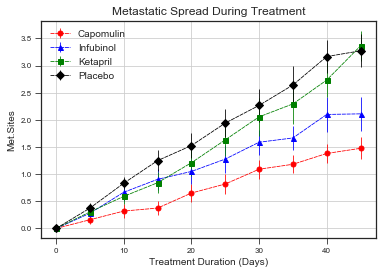

In [13]:
# Generate the Plot (with Error Bars)

plt.style.use('seaborn-ticks')

plt.errorbar(metas_mean_df_pivot.index, metas_mean_df_pivot['Capomulin'], yerr=metas_sem_df_pivot['Capomulin'],
             color = 'red', marker='o', markersize=5, linestyle=(0, (5, 1)),linewidth=0.8)    #linestyle=(0, (5, 1)) means densely dashed

plt.errorbar(metas_mean_df_pivot.index, metas_mean_df_pivot['Infubinol'], yerr=metas_sem_df_pivot['Infubinol'],
            color = 'blue', marker='^', markersize=5, linestyle=(0, (5, 1)),linewidth=0.8)

plt.errorbar(metas_mean_df_pivot.index, metas_mean_df_pivot['Ketapril'], yerr=metas_sem_df_pivot['Ketapril'],
            color = 'green', marker='s', markersize=5, linestyle=(0, (5, 1)),linewidth=0.8)

plt.errorbar(metas_mean_df_pivot.index, metas_mean_df_pivot['Placebo'], yerr=metas_sem_df_pivot['Placebo'],
            color = 'black', marker='D', markersize=5, linestyle=(0, (5, 1)),linewidth=0.8)

x_lim = len(metas_mean_df_pivot.index)

# Chart title
plt.title("Metastatic Spread During Treatment")

# x label
plt.xlabel("Treatment Duration (Days)")
plt.rc('xtick',labelsize=8)

# y label
plt.ylabel("Met.Sites")
plt.rc('ytick',labelsize=8)

# legend 
plt.legend(loc='upper left',prop={'size': 10})

# Save the Figure
plt.grid()
plt.savefig("Metastatic Spread During Treatment.png",dpi=600)   # should before plt.show method


# Show the Figure
plt.show()



## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_group = treatments_complete.groupby(["Drug","Timepoint"])


# Convert to DataFrame
mice_count_df = pd.DataFrame({
        "Mouse Count" : mice_group["Mouse ID"].count()
})


# Preview DataFrame

mice_count_df.reset_index(inplace=True)       #index
mice_count_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df_pivot = mice_count_df.pivot_table(index='Timepoint',columns='Drug',values='Mouse Count') 
# Preview the Data Frame
mice_count_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [16]:
# Generate the Plot (Accounting for percentages)

survival_percentage = ((mice_count_df_pivot/mice_count_df_pivot.iloc[0]) * 100)
survival_percentage



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


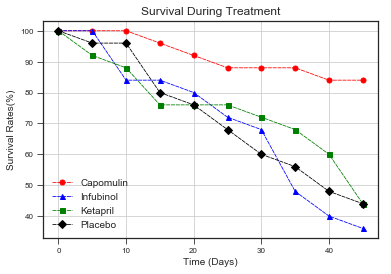

In [17]:

# Generate the Plot (with Error Bars)

plt.style.use('seaborn-ticks')

plt.plot(mice_count_df_pivot.index, survival_percentage['Capomulin'], 
         color = 'red', marker='o', markersize=5, linestyle=(0, (5, 1)),linewidth=0.8)

plt.plot(mice_count_df_pivot.index, survival_percentage['Infubinol'], 
         color = 'blue', marker='^', markersize=5, linestyle=(0, (5, 1)),linewidth=0.8)

plt.plot(mice_count_df_pivot.index, survival_percentage['Ketapril'], 
         color = 'green', marker='s', markersize=5, linestyle=(0, (5, 1)),linewidth=0.8)

plt.plot(mice_count_df_pivot.index, survival_percentage['Placebo'], 
         color = 'black', marker='D', markersize=5, linestyle=(0, (5, 1)),linewidth=0.8)


# Chart title
plt.title("Survival During Treatment")

# x label
plt.xlabel("Time (Days)")
plt.rc('xtick',labelsize=8)

# y label
plt.ylabel("Survival Rates(%)")
plt.rc('ytick',labelsize=8)

# legend 
plt.legend(loc='lower left',prop={'size': 10})

# Save the Figure
plt.grid()

#plt.savefig("Metastatic Spread During Treatment.png")  
plt.savefig("Survival During Treatment.png",dpi=600)   # should before plt.show method

# Show the Figure
plt.show()

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
tumor_volume_change = (tumor_mean_df_pivot.iloc[-1])-(tumor_mean_df_pivot.iloc[0])
tumor_change_percent = (tumor_volume_change)/(tumor_mean_df_pivot.iloc[0])*100

# Display the data to confirm
tumor_change_percent

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [19]:
tumor_change_percent_four_drugs = tumor_change_percent.loc[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
tumor_change_percent_four_drugs

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

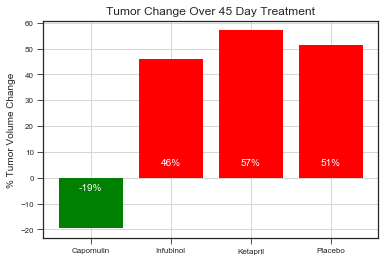

In [26]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs

# Orient widths. Add labels, tick marks, etc. 

x_axis = np.arange(len(tumor_change_percent_four_drugs))
y_axis = tumor_change_percent_four_drugs
Drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]

plt.bar(x_axis, y_axis,
        color=["r" if y_axis[i] >0 else "g" for i in np.arange(len(x_axis))],
        align="center",
        )
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,Drugs)

# Chart title
plt.title("Tumor Change Over 45 Day Treatment")


# y label
plt.ylabel("% Tumor Volume Change")
plt.rc('ytick',labelsize=8)

plt.grid()

# Putting Value to the center of bar chart

count = 0
for x in tumor_change_percent_four_drugs:
    if x < 0:
        value_spot = -5
    else:
        value_spot = 5
    plt.text(count, value_spot, str(round(x)) + '%', ha = 'center', color = 'w')
    count +=1


#plt.savefig("Metastatic Spread During Treatment.png")  
plt.savefig("Tumor Change Over 45 Day Treatment.png", dpi=600)   # should before plt.show method

# Show the Figure
plt.show()
 

